In [1]:
!pip install tensorflow-gpu==1.15

     |████████████████████████████████| 411.5MB 43kB/s 
     |████████████████████████████████| 51kB 8.2MB/s 
     |████████████████████████████████| 512kB 54.4MB/s 
     |████████████████████████████████| 3.8MB 37.4MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7540 sha256=429ae2401502698546ddc209b820843d233de545afad9d21f63bffa46b3562f9
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.4.1 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.4.1 has requirement tensorboard~=2.4, but you'll have tensorboard 1.15.0 which is incompatible.
ERROR: tensorflow 2.4.1 has requirement tensorflow-estimator<2.5.0,>=2.4.0, but you'll have tensorflow-estimator 1.15.1 which is incompatible.
ERROR: tensorflow-probability 0.12.1 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing instal

In [2]:
!rm -rf datasets && mkdir -p datasets
!wget https://s3-us-west-1.amazonaws.com/udacity-selfdrivingcar/traffic-signs-data.zip -O datasets/traffic-signs-data.zip
!cd datasets && unzip traffic-signs-data.zip && rm *.zip

--2021-03-19 19:37:51--  https://s3-us-west-1.amazonaws.com/udacity-selfdrivingcar/traffic-signs-data.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.112.184
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.112.184|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 123524425 (118M) [application/zip]
Saving to: ‘datasets/traffic-signs-data.zip’

datasets/traffic-si 100%[===================>] 117.80M  33.4MB/s    in 3.5s    

2021-03-19 19:37:55 (33.4 MB/s) - ‘datasets/traffic-signs-data.zip’ saved [123524425/123524425]

Archive:  traffic-signs-data.zip
  inflating: test.p                  
  inflating: train.p                 
  inflating: valid.p                 


In [1]:
!ls datasets/

test.p	train.p  valid.p


In [2]:
import pickle
import os
from collections import namedtuple
import numpy as np
import matplotlib.pyplot as plt
%matplotlib  inline

In [3]:
def load_data(name):
  DATASETS_DIR = 'datasets'
  path = os.path.join(DATASETS_DIR, name + '.p')
  with open(path, 'rb') as f:
    data = pickle.load(f)
  mean = np.mean(data['features'], axis=(1,2,3))
  stddev = np.std(data['features'], axis=(1,2,3))
  ins = []
  for i, m, s in zip(data['features'], mean, stddev):
    in_ = (i - m) / s
    ins.append(in_)
  data['features_normalized'] = np.array(ins)
  data['examples_n'] = data['features'].shape[0]
  return data

DATASETS_NAMES = ['train', 'valid', 'test']

datasets = dict([(name, load_data(name)) for name in DATASETS_NAMES])
Dataset = namedtuple('Dataset', datasets['test'].keys())
datasets = dict([(k, Dataset(**v)) for k, v in datasets.items()])

In [4]:
SIGNNAMES_FILE = 'signnames.csv'
SIGNNAMES = '''ClassId,SignName
0,Speed limit (20km/h)
1,Speed limit (30km/h)
2,Speed limit (50km/h)
3,Speed limit (60km/h)
4,Speed limit (70km/h)
5,Speed limit (80km/h)
6,End of speed limit (80km/h)
7,Speed limit (100km/h)
8,Speed limit (120km/h)
9,No passing
10,No passing for vehicles over 3.5 metric tons
11,Right-of-way at the next intersection
12,Priority road
13,Yield
14,Stop
15,No vehicles
16,Vehicles over 3.5 metric tons prohibited
17,No entry
18,General caution
19,Dangerous curve to the left
20,Dangerous curve to the right
21,Double curve
22,Bumpy road
23,Slippery road
24,Road narrows on the right
25,Road work
26,Traffic signals
27,Pedestrians
28,Children crossing
29,Bicycles crossing
30,Beware of ice/snow
31,Wild animals crossing
32,End of all speed and passing limits
33,Turn right ahead
34,Turn left ahead
35,Ahead only
36,Go straight or right
37,Go straight or left
38,Keep right
39,Keep left
40,Roundabout mandatory
41,End of no passing
42,End of no passing by vehicles over 3.5 metric tons
'''
with open(SIGNNAMES_FILE, 'w') as f:
  f.write(SIGNNAMES)

In [5]:
for name in DATASETS_NAMES:
  n = datasets[name].examples_n
  print('name: %s #examples:%d' % (name, n))
print('Image shape:', datasets['train'].features.shape[1:3])
labels_n = np.unique(np.concatenate([datasets[name].labels for name in DATASETS_NAMES])).shape[0]
print('#Unique classes:', labels_n)

name: train #examples:34799
name: valid #examples:4410
name: test #examples:12630
Image shape: (32, 32)
#Unique classes: 43


In [6]:
def show_images(images):
  n = len(images)
  plt.subplots(1, n, figsize=(5 *  n, 5))
  for idx, img in enumerate(images):
    plt.subplot(1, n, idx + 1)
    plt.imshow(img)

# Show examples from data sets

Train examples:


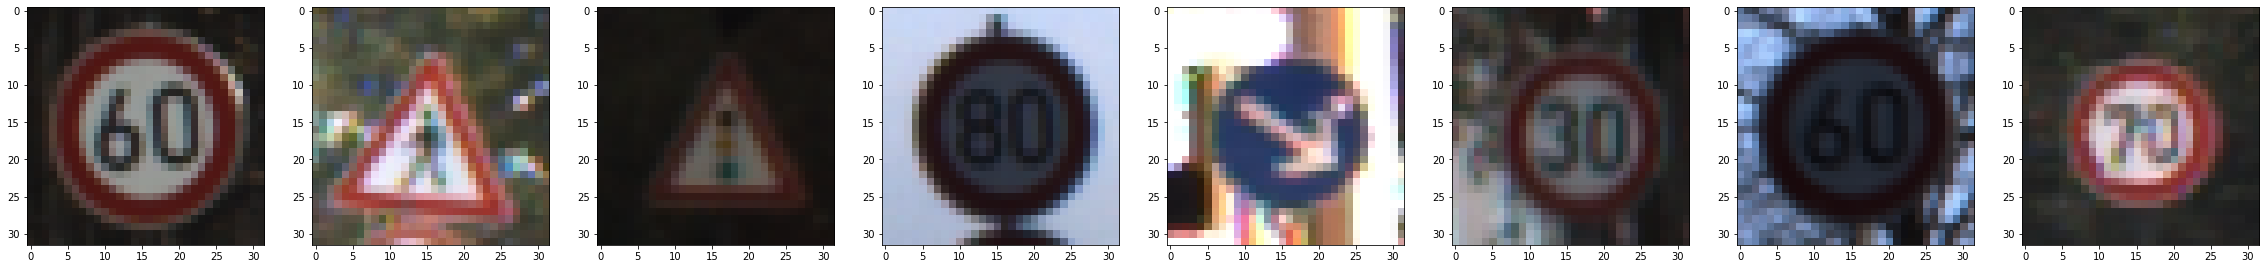

In [7]:
print('Train examples:')
show_images(datasets['train'].features[np.random.randint(0, 20000, 8)])

In [8]:
print('Valid examples:')
show_images(datasets['valid'].features[np.random.randint(0, 4400, 8)])

Valid examples:


In [9]:
print('Test examples:')
show_images(datasets['test'].features[np.random.randint(0, 12600, 8)])

Test examples:


# Distribution of examples 

In [10]:
plt.subplots(1, 3, figsize=(5 *  3, 5))
for idx, name in enumerate(DATASETS_NAMES):
  plt.subplot(1, 3, idx + 1)
  classes, counts = np.unique(datasets[name].labels, return_counts=True)
  plt.bar(classes,  counts)
  plt.title('Classes  in ' + name)
  plt.xlabel('Class ID')
  plt.ylabel('Occurrences')

Unequal distribution of training examples may lead to overfitting on some classes or the network won't learn some classes.

## Distribution of values

In [11]:
plt.subplots(1, 3, figsize=(5 *  3, 5))
for idx, name in enumerate(DATASETS_NAMES):
  plt.subplot(1, 3, idx + 1)
  plt.hist(datasets[name].features.reshape(-1))
  plt.title(name)
plt.suptitle('Values distribution (not normalized)')

Text(0.5, 0.98, 'Values distribution (not normalized)')

Text(0.5, 0.98, 'Values distribution (normalized)')

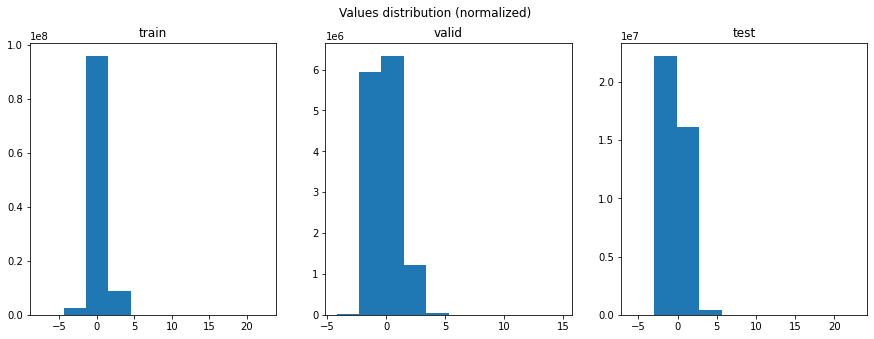

In [12]:
plt.subplots(1, 3, figsize=(5 *  3, 5))
for idx, name in enumerate(DATASETS_NAMES):
  plt.subplot(1, 3, idx + 1)
  plt.hist(datasets[name].features_normalized.reshape(-1))
  plt.title(name)
plt.suptitle('Values distribution (normalized)')

# Training the network

In [13]:
import tensorflow as tf

In [14]:
def conv2d(x, outsize, dropout_rate,  ksize=3, mean=0,  stddev=0.01, apply_pool=True, apply_relu=True):
  insize = x.shape[-1]
  print('Input:', x.shape)
  print('Conv2D:', insize, ksize, ksize, outsize)
  var = tf.Variable(tf.truncated_normal(shape=(ksize, ksize, insize, outsize), mean=mean, stddev=stddev))
  bias = tf.Variable(tf.truncated_normal(shape=(outsize,), mean=mean, stddev=stddev))
  x = tf.nn.conv2d(x, var, strides=[1, 1, 1, 1], padding='VALID') + bias
  if apply_relu:
    x = tf.nn.relu(x)
  if apply_pool:
    x = tf.nn.max_pool(x, ksize=(1, 2, 2, 1), strides=(1, 2, 2, 1), padding='VALID')
  x = tf.nn.dropout(x, rate=dropout_rate)
  print('Output:', x.shape)
  return x

def flatten(x):
  return tf.reshape(x, (-1, x.shape[1] * x.shape[2] * x.shape[3]))

def fc(x, outsize, dropout_rate, mean=0, stddev=0.01, apply_relu=True):
  insize = x.shape[-1]
  print('Input:', x.shape)
  print('W:', insize, outsize)
  var = tf.Variable(tf.truncated_normal(shape=(insize, outsize), mean=mean, stddev=stddev))
  bias = tf.Variable(tf.truncated_normal(shape=(outsize,), mean=mean, stddev=stddev))
  x  = tf.matmul(x, var) + bias
  if apply_relu:
    x = tf.nn.relu(x)
  x = tf.nn.dropout(x, rate=dropout_rate)
  print('Output:', x.shape)
  return x

In [15]:
def convnet(x, classes_n, dropout_rate):
  x_ = conv2d(x, 32, dropout_rate)
  x_ = conv2d(x_, 128, dropout_rate)
  x_ = conv2d(x_, 256, dropout_rate, ksize=3)
  x_ = flatten(x_)
  x_ = fc(x_, 2048, dropout_rate, apply_relu=True)
  x_ = fc(x_, 256, dropout_rate, apply_relu=True)
  x_ = fc(x_, classes_n, dropout_rate, apply_relu=False)
  return x_

In [16]:
def evaluate(x, y, acc_op, dropout_op, x_data, y_data, batch_size=16):
  N = x_data.shape[0]
  sess = tf.get_default_session()
  result = 0
  for start in range(0, N, batch_size):
      end = min(N, start + batch_size)
      batch_x = x_data[start:end]
      batch_y = y_data[start:end]
      acc = sess.run(acc_op, feed_dict={x:batch_x, y:batch_y, dropout_op: 0.})
      result += acc * batch_size
  return result / N

In [17]:
CLASS_N = 43
LEARNING_RATE=0.0001
EPOCHS = 400
BATCH_SIZE = 32


dropout_prob = tf.placeholder(tf.float32)
x = tf.placeholder(tf.float32, shape=(None, 32, 32, 3))
y = tf.placeholder(tf.int32, shape=(None))
y_ = tf.one_hot(y, CLASS_N)

logits = convnet(x, CLASS_N, dropout_prob)
softmax = tf.nn.softmax(logits)
topk = tf.nn.top_k(softmax, k=5)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_, logits=logits)
loss_op = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=LEARNING_RATE)
train_op = optimizer.minimize(loss_op)
correct_prediction = tf.equal(tf.argmax(logits, axis=1), tf.argmax(y_, axis=1))
acc_op = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

Input: (?, 32, 32, 3)
Conv2D: 3 3 3 32
Output: (?, 15, 15, 32)
Input: (?, 15, 15, 32)
Conv2D: 32 3 3 128
Output: (?, 6, 6, 128)
Input: (?, 6, 6, 128)
Conv2D: 128 3 3 256
Output: (?, 2, 2, 256)
Input: (?, 1024)
W: 1024 2048
Output: (?, 2048)
Input: (?, 2048)
W: 2048 256
Output: (?, 256)
Input: (?, 256)
W: 256 43
Output: (?, 43)


In [18]:
from sklearn.utils import shuffle

TRAIN_EXAMPLES_N = datasets['train'].examples_n
ACC_LIMIT = 0.97

with tf.Session() as sess:
  print("Initialize variables...")
  sess.run(tf.global_variables_initializer())

  print("Training the network...")
  try:
    for epoch_idx in range(EPOCHS):
      x_train, y_train = shuffle(datasets['train'].features_normalized, datasets['train'].labels)
      for start in range(0, TRAIN_EXAMPLES_N, BATCH_SIZE):
        end = min(TRAIN_EXAMPLES_N, start + BATCH_SIZE)
        batch_x = x_train[start:end]
        batch_y = y_train[start:end]
        sess.run(train_op, feed_dict={x:batch_x, y:batch_y, dropout_prob: 0.5})
      accuracy = evaluate(x, y, acc_op, dropout_prob, datasets['valid'].features_normalized, datasets['valid'].labels)
      print('Epoch %02d finished! Accuracy: %f' % (epoch_idx, accuracy))
      if accuracy > ACC_LIMIT:
        print('Accuracy limit (%f) reached with %f! Stopping!' % (ACC_LIMIT, accuracy))
        break
  except:
    pass
  
  try:
    saver
  except NameError:
    saver =  tf.train.Saver()
  saver.save(sess, 'model')

Initialize variables...
Training the network...
Epoch 00 finished! Accuracy: 0.200454
Epoch 01 finished! Accuracy: 0.381633
Epoch 02 finished! Accuracy: 0.489478
Epoch 03 finished! Accuracy: 0.646485
Epoch 04 finished! Accuracy: 0.715193
Epoch 05 finished! Accuracy: 0.769388
Epoch 06 finished! Accuracy: 0.808844
Epoch 07 finished! Accuracy: 0.840816
Epoch 08 finished! Accuracy: 0.867347
Epoch 09 finished! Accuracy: 0.868027
Epoch 10 finished! Accuracy: 0.894785
Epoch 11 finished! Accuracy: 0.898186
Epoch 12 finished! Accuracy: 0.908163
Epoch 13 finished! Accuracy: 0.908163
Epoch 14 finished! Accuracy: 0.919728
Epoch 15 finished! Accuracy: 0.926077
Epoch 16 finished! Accuracy: 0.930385
Epoch 17 finished! Accuracy: 0.938322
Epoch 18 finished! Accuracy: 0.941723
Epoch 19 finished! Accuracy: 0.944218
Epoch 20 finished! Accuracy: 0.946939
Epoch 21 finished! Accuracy: 0.948526
Epoch 22 finished! Accuracy: 0.948073
Epoch 23 finished! Accuracy: 0.947619
Epoch 24 finished! Accuracy: 0.956916
Ep

# Test our model

In [19]:
with tf.Session() as sess:
  print("Loading network")
  loader = tf.train.import_meta_graph('model.meta')
  loader.restore(sess, 'model')
  accuracy = evaluate(x, y, acc_op, dropout_prob, datasets['test'].features_normalized, datasets['test'].labels)
  print('Test set accuracy: %f' % accuracy)

Loading network
INFO:tensorflow:Restoring parameters from model
Test set accuracy: 0.966772


# Test model on new images

In [20]:
!ls signs-32x32/

1.png  2.png  3.png  4.png  5.png  6.png  7.png  labels.csv


In [21]:
import glob
import pandas as pd
from matplotlib.image import imread

In [22]:
images_paths = glob.glob('signs-32x32/*.png')
labels = pd.read_csv('signs-32x32/labels.csv', header=None)
labels_dict = dict(zip(labels[0], labels[1]))

In [23]:
signnames = pd.read_csv('signnames.csv', header=None)
signnames_dict = dict(zip(signnames[0], signnames[1]))

In [24]:
images = [(os.path.basename(f), imread(f)[:32,:32,:3]) for f in images_paths]

In [25]:
new_labels = []
new_images_normalized = []

img_n = len(images)
plt.subplots(1, img_n, figsize=(5 *  img_n, 5))
for idx, (name, img) in enumerate(images):
  plt.subplot(1, img_n, idx+1)
  plt.imshow(img)
  label = labels_dict[name]
  label_desc = signnames_dict[str(label)]
  plt.title('%s,%d, %s' % (name, label, label_desc), fontsize=15)
  new_labels.append(label)
  new_images_normalized.append((img - np.mean(img)) / np.std(img))

# Test network on the new examples

(array([ 198., 1412., 1583., 1424., 1997., 2134., 2972., 4004., 4338.,
        1442.]),
 array([-2.5846303 , -2.1612823 , -1.7379342 , -1.3145862 , -0.8912381 ,
        -0.46789008, -0.04454205,  0.378806  ,  0.802154  ,  1.225502  ,
         1.6488501 ], dtype=float32),
 <a list of 10 Patch objects>)

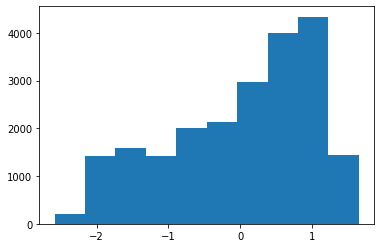

In [26]:
new_images_normalized = np.array(new_images_normalized)
new_labels = np.array(new_labels)
plt.hist(new_images_normalized.reshape(-1))

In [27]:
with tf.Session() as sess:
  print("Loading network")
  loader = tf.train.import_meta_graph('model.meta')
  loader.restore(sess, 'model')
  accuracy, logits_output, topk_output = sess.run([acc_op, logits, topk], feed_dict={x:new_images_normalized, y:new_labels, dropout_prob: 0.})
  outputs = np.argmax(logits_output, axis=1)
  print('Test set accuracy: %f' % accuracy)
  print('Outputs: ', outputs)
  print('Top 5: ', topk_output)

Loading network
INFO:tensorflow:Restoring parameters from model
Test set accuracy: 0.428571
Outputs:  [38  5  1 16  4 13 18]
Top 5:  TopKV2(values=array([[9.9998176e-01, 8.9100613e-06, 7.9275997e-06, 3.9202473e-07,
        3.3344179e-07],
       [2.1298778e-01, 1.9333926e-01, 1.1555688e-01, 8.7640397e-02,
        7.5837031e-02],
       [9.9994111e-01, 2.1411368e-05, 1.7985254e-05, 5.3397030e-06,
        4.3912137e-06],
       [9.8713362e-01, 2.9501193e-03, 1.6290360e-03, 1.4473967e-03,
        1.3839096e-03],
       [6.1739910e-01, 6.4752355e-02, 5.9301689e-02, 4.9069993e-02,
        4.8972551e-02],
       [1.0000000e+00, 1.1051227e-15, 1.8339068e-16, 4.9519213e-18,
        3.1481251e-18],
       [9.9999869e-01, 9.7355610e-07, 1.4287336e-07, 1.3371718e-07,
        4.1198771e-08]], dtype=float32), indices=array([[38, 39, 40, 20, 37],
       [ 5, 16,  2, 11,  7],
       [ 1,  2,  0, 25,  5],
       [16, 23,  9, 41, 10],
       [ 4,  9, 10, 19, 40],
       [13, 15, 35,  1,  3],
       [18

In [28]:
print("Top 1 accuracy:", accuracy)

Top 1 accuracy: 0.42857143


In [29]:
accuracy_top5 = 0
for label, answers in zip(new_labels, topk_output.indices):
  if label in answers:
    accuracy_top5 += 1
accuracy_top5 /= len(new_labels)
print("TOP5 accuracy:", accuracy_top5)

TOP5 accuracy: 0.5714285714285714


In [35]:
img_n = len(images)
accuracy_top5 = 0
plt.subplots(1, img_n, figsize=(5 *  img_n, 5))
for idx, (label, probs, answers, (name, img)) in enumerate(zip(new_labels, topk_output.values, topk_output.indices, images)):
  plt.subplot(1, img_n, idx+1)
  plt.imshow(img)
  label = labels_dict[name]
  label_desc = signnames_dict[str(label)]
  plt.title('%s,%d, %s' % (name, label, label_desc), fontsize=15)
  if label in answers:
    accuracy_top5 += 1
  print("TOP5 for image: %s" % name)
  for p, a in zip(probs, answers):
    print("- %.02f: [%02d] %s" % (p, a, signnames_dict[str(a)]))
accuracy_top5 /= len(new_labels)
print("TOP5 accuracy:", accuracy_top5)

TOP5 for image: 1.png
- 1.00: [38] Keep right
- 0.00: [39] Keep left
- 0.00: [40] Roundabout mandatory
- 0.00: [20] Dangerous curve to the right
- 0.00: [37] Go straight or left
TOP5 for image: 6.png
- 0.21: [05] Speed limit (80km/h)
- 0.19: [16] Vehicles over 3.5 metric tons prohibited
- 0.12: [02] Speed limit (50km/h)
- 0.09: [11] Right-of-way at the next intersection
- 0.08: [07] Speed limit (100km/h)
TOP5 for image: 2.png
- 1.00: [01] Speed limit (30km/h)
- 0.00: [02] Speed limit (50km/h)
- 0.00: [00] Speed limit (20km/h)
- 0.00: [25] Road work
- 0.00: [05] Speed limit (80km/h)
TOP5 for image: 5.png
- 0.99: [16] Vehicles over 3.5 metric tons prohibited
- 0.00: [23] Slippery road
- 0.00: [09] No passing
- 0.00: [41] End of no passing
- 0.00: [10] No passing for vehicles over 3.5 metric tons
TOP5 for image: 3.png
- 0.62: [04] Speed limit (70km/h)
- 0.06: [09] No passing
- 0.06: [10] No passing for vehicles over 3.5 metric tons
- 0.05: [19] Dangerous curve to the left
- 0.05: [40] Rou